<a href="https://colab.research.google.com/github/JaganFoundr/PyTorchNN/blob/main/Image%20Classification/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# image classification with convolutional neural networks (CIFAR10)

#importing all the important libraries 1
import torch
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import SubsetRandomSampler, DataLoader

In [73]:
#downloading the datasets 2
dataset=CIFAR10(root='./data', download=True, train=True, transform=transforms.ToTensor())
testset=CIFAR10(root='./data', download=True, train=False, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


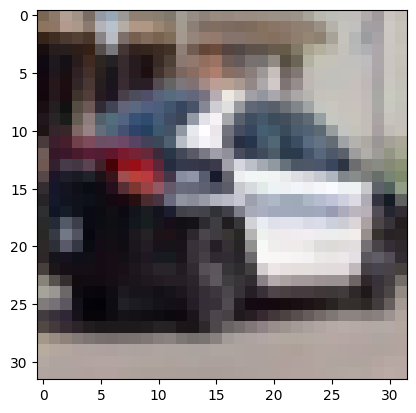

object number:  1
object name:  automobile


In [74]:
#plotting the images (as it is not a grayscale image, but contains rgb, when those images were converted into tensors,
# its size was (3,32,32) but for getting the original color of the image using matplotlib, it has to be converted into the
# the form (32,32,3) (height, width, no. of color channels) 3
images, labels=dataset[1090]
object_name=dataset.classes[labels]

rgb_images=images.permute(1,2,0).numpy() #1,2,0 is a standard approach for most of the images
plt.imshow(rgb_images)
plt.show()

print("object number: ", labels)
print("object name: ", object_name)


In [75]:
images.shape

torch.Size([3, 32, 32])

In [76]:
# splitting the whole dataset into training set and test set 4
def split_data(data, valid_percent,seed):
  valid_num=int(data*valid_percent)
  np.random.seed(seed)# for not getting shuffled of the validation data that has been recieved already by shuffling.
  shuffle=np.random.permutation(data)
  return shuffle[valid_num:], shuffle[:valid_num]
training_data, validation_data=split_data(len(dataset), valid_percent=0.2,seed=44)

print('training data: ',len(training_data))
print('validation data: ', len(validation_data))

print('portion of validation data: ', validation_data[:20])

training data:  40000
validation data:  10000
portion of validation data:  [49457 20706 46059 38076  8394 13737 43619  3392 43068  5384 37471 24486
 31073 34612 26783 46026 19185  2907 23882 39491]


In [77]:
# putting in the randomsampler and then in the dataloader 5
train_sampler=SubsetRandomSampler(training_data)
validation_sampler=SubsetRandomSampler(validation_data)

batch_size=100

train_loader=DataLoader(dataset, batch_size, sampler=train_sampler)
validation_loader=DataLoader(dataset, batch_size, sampler=validation_sampler)

In [78]:
#defining the model 6
model=nn.Sequential(

#layer1
nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3, stride=1, padding=1), #conv2d for defining the cnn layer
nn.ReLU(),
nn.MaxPool2d(2,2), #16x16x16

#layer2
nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3, stride=1, padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), #16x8x8

#layer3
nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3, stride=1, padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), #16x4x4

#layer4
nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3, stride=1, padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), #16x2x2

#layer5
nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3, stride=1, padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), #16x1x1

nn.Flatten(), #converts this 16x1x1 into just 16 (vector)
nn.Linear(16,10) # finally 16 inputs and 10 outputs for each input

 ) # maxpool for reducing the size of the image after each and every layer or computation

In [79]:
#putting the training loader in the for loop as inputs and outputs for prediction 7
for images, labels in train_loader:

  prediction = model(images)

In [80]:
#displaying the prediction and exact portion of the prediction 8
print("image shape: ",images.shape)
print("output shape: ", prediction.shape)
print("portion of the prediction: ", prediction[10])

sum_check=torch.sum(prediction[10])
print(sum_check)

image shape:  torch.Size([100, 3, 32, 32])
output shape:  torch.Size([100, 10])
portion of the prediction:  tensor([-0.2172, -0.1640, -0.0683,  0.0621, -0.1712, -0.2099,  0.0471, -0.0298,
        -0.2914, -0.1459], grad_fn=<SelectBackward0>)
tensor(-1.1883, grad_fn=<SumBackward0>)


In [81]:
#convert the predicted probablities to a sum of one. 9
changed_prob=F.softmax(prediction, dim=1)

prob=torch.sum(changed_prob[10])
print(prob)

print("changed probablities: ",changed_prob[10])

tensor(1., grad_fn=<SumBackward0>)
changed probablities:  tensor([0.0901, 0.0950, 0.1045, 0.1191, 0.0943, 0.0907, 0.1173, 0.1086, 0.0836,
        0.0967], grad_fn=<SelectBackward0>)


In [82]:
#exact prediction made by the model 10
_,pred = torch.max(prediction, dim=1)
print(pred)

dataset.classes[9]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3])


'truck'

In [83]:
#actual target labels 11
labels

tensor([8, 3, 5, 5, 1, 6, 3, 5, 6, 5, 4, 5, 0, 9, 4, 8, 6, 6, 7, 0, 9, 3, 7, 8,
        6, 8, 7, 2, 2, 4, 5, 7, 5, 9, 1, 5, 0, 8, 9, 5, 7, 0, 8, 3, 9, 7, 6, 9,
        6, 7, 2, 5, 8, 0, 2, 8, 7, 3, 2, 8, 0, 1, 3, 5, 7, 9, 9, 7, 3, 3, 3, 5,
        5, 7, 0, 0, 2, 8, 5, 9, 3, 3, 1, 9, 6, 1, 5, 7, 8, 4, 5, 2, 2, 9, 1, 6,
        3, 7, 7, 7])

In [84]:
# loss fn 12
loss_function = F.cross_entropy

In [85]:
#optimizer 13
opt=torch.optim.Adam(model.parameters(), lr=0.005)

In [86]:
#accuracy fn 14
def accuracy(output, labels):
  _, pred = torch.max(output, dim=1)
  return torch.sum(pred==labels).item()/len(pred)*100

In [87]:
#loss_batch 15
def loss_batch(model, loss_function, images, labels, opt, metrics=accuracy):
  prediction=model(images)
  loss=loss_function(prediction, labels)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result=None
  if metrics is not None:
    metric_result=metrics(prediction, labels)

  return loss.item(), len(images), metric_result

In [88]:
#evaluate 16
def evaluate(model, loss_function, validation_loader, metrics=accuracy):
  with torch.no_grad():
    validation_result=[loss_batch(model, loss_function, images, labels, opt=None, metrics=accuracy) for images, labels in validation_loader]

    losses, nums, metric = zip(*validation_result)

    total=np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums))/total

    metric_result=None
    if metrics is not None:
      metric_result = np.sum(np.multiply(metric, nums))/total

  return avg_loss, total, metric_result


In [89]:
#training 17
def train(nepochs, model, loss_function, images, labels, train_loader, validation_loader, opt, metrics=accuracy):
  for epoch in range(nepochs):
    model.train()
    for images, labels in train_loader:
      images, labels = images, labels
      train_loss, _, train_acc = loss_batch(model, loss_function, images, labels, opt, metrics=accuracy)

    model.eval()
    valid_loss,_,valid_acc=evaluate(model, loss_function, validation_loader, metrics=accuracy)

    print(f"epoch {epoch+1}/{nepochs}: ")
    print(f"training loss: {train_loss:.4f} and validation loss: {valid_loss:.4f}")
    print(f"training accuracy: {train_acc:.2f}% and validation accuracy: {valid_acc:.2f}%")

  return train_loss, valid_loss, train_acc, valid_acc

train_loss, valid_loss, train_acc, valid_acc = train(10, model, loss_function, images, labels, train_loader, validation_loader, opt, metrics=accuracy)

epoch 1/15: 
training loss: 1.7465 and validation loss: 1.6958
training accuracy: 30.00% and validation accuracy: 36.45%
epoch 2/15: 
training loss: 1.4727 and validation loss: 1.4835
training accuracy: 44.00% and validation accuracy: 45.02%
epoch 3/15: 
training loss: 1.2367 and validation loss: 1.3746
training accuracy: 60.00% and validation accuracy: 49.28%
epoch 4/15: 
training loss: 1.3173 and validation loss: 1.3050
training accuracy: 46.00% and validation accuracy: 52.32%
epoch 5/15: 
training loss: 0.8872 and validation loss: 1.2362
training accuracy: 66.00% and validation accuracy: 55.45%
epoch 6/15: 
training loss: 1.2517 and validation loss: 1.2577
training accuracy: 49.00% and validation accuracy: 55.01%
epoch 7/15: 
training loss: 1.2059 and validation loss: 1.1885
training accuracy: 64.00% and validation accuracy: 57.10%
epoch 8/15: 
training loss: 1.4092 and validation loss: 1.2466
training accuracy: 50.00% and validation accuracy: 55.48%
epoch 9/15: 
training loss: 1.15

In [129]:
#prediction function 18
def prediction(images, model):
  input=images.unsqueeze(0)
  output=model(input)
  _,pred=torch.max(output, dim=1)
  return pred[0].item()

labels:  horse
predicted:  horse


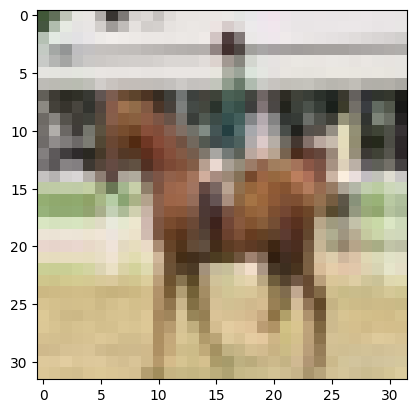

(1.081886042356491, 10000, 61.51)


In [138]:
#plotting the predictions 19
images, labels=testset[1119]
object_name=dataset.classes[labels]
rgb_images=images.permute(1,2,0).numpy()
plt.imshow(rgb_images)
print("labels: ",object_name)
print("predicted: ",dataset.classes[prediction(images, model)])
plt.show()


test_loader=DataLoader(testset, batch_size=200)

#test accuracy (you define it in your own form)
print(evaluate(model, loss_function, test_loader, metrics=accuracy))

In [ ]:
#saving the model
torch.save(model.state_dict(), 'CNNmodel.pth')
model.state_dict()

In [ ]:
#loading the saved model
savedmodel=model
savedmodel.load_state_dict(torch.load('CNNmodel.pth'))
savedmodel.state_dict()